# SQLite3 tutorial

https://docs.python.org/3/library/sqlite3.html

In this notebook we will create a database of fictitious company using basic sqlite3 functionality.

In [1]:
import sqlite3

## Connection

First, we need to create a new database and open a database connection to allow sqlite3 to work with it. Call `sqlite3.connect()` to create a connection to the database `company.db` in the current working directory, implicitly creating it if it does not exist:

In [3]:
con = sqlite3.connect('company.db')

## Cursor

The returned connection object `con` represents the connection to the on-disk database. 


In order to execute SQL statements and fetch results from SQL queries, we will need to use a database cursor

Call `con.nursor()`() to create thc Cursor:

In [5]:
cur = con.cursor()

Now that we have got a database connection and a cursor, we can create the database tables company and insert data into it. For simplicity, we can just use SQL file to import into work environment all tables. 

In order to execute SQL queries, we need to use file `company.sql` and open in python to work with it.

In [7]:
class AcquireData:
    '''Acquirement of data by type input file SQL'''
    def __init__(self):
        self.name = self.execute_script()

    def execute_script(self):
        try:
            cur.executescript(self.acquire_file())
            print('SQL statements executed successfully!')

        except sqlite3.Error as err:
            print(f'Error running the script: {err}')

        con.commit()

    def acquire_file(self):
        proceed = True

        while proceed:
            filename = input('Type correct name of input file: ')
            
            try:
                # S := SQL file
                with open(filename, 'r') as S:
                    # s := statements
                    s = S.read()
        
                print('Input file SQL acquired successfully!')
                proceed = False

                return s
        
            except FileNotFoundError:
                print('File not found! Retry please!\n')

In [9]:
AcquireData.__doc__

'Acquirement of data by type input file SQL'

In [11]:
AcquireData()

Type correct name of input file:  company.sqlx


File not found! Retry please!



Type correct name of input file:  company.sql


Input file SQL acquired successfully!
SQL statements executed successfully!


## Queries

#### 1. The birth date and address for the employees whose name is 'John B. smith'

In [242]:
res = con.execute(
    '''
        SELECT bdate, address FROM employee
        WHERE fname = 'John' AND minit = 'B' AND lname = 'Smith'
    '''
)

res.fetchall()

[('1955-01-09', '731 Fondren, Houston, TX')]

#### 2. The name and address of all employees who work for the 'Research' department

In [277]:
res = con.execute('''SELECT * FROM employee''')
[i[0] for i in res.description]

['fname',
 'minit',
 'lname',
 'ssn',
 'bdate',
 'address',
 'sex',
 'salary',
 'superssn',
 'dno']

In [15]:
res = con.execute('''SELECT * FROM department''')
[i[0] for i in res.description]

['dname', 'dnumber', 'mgrssn', 'mgrstartdate']

In [275]:
res = con.execute(
    '''
        SELECT fname, minit, lname, address FROM employee
            JOIN department
            ON employee.dno = department.dnumber
            WHERE department.dname = 'Research'
    '''
)

res.fetchall()

[('Franklin', 'T', 'Wong', '638 Voss, Houston, TX'),
 ('John', 'B', 'Smith', '731 Fondren, Houston, TX'),
 ('Joyce', 'A', 'English', '5631 Rice, Houston, TX'),
 ('Ramesh', 'K', 'Narayan', '971 Fire Oak, Humble, TX')]

#### 3. For every project located 'Stafford', list the project number, the controlling department number and the department manager's last name, address and birth date.

In [315]:
res = con.execute(
    '''
        SELECT pnumber, dnum, lname, address, bdate FROM employee
            JOIN project JOIN department
            ON employee.ssn = department.mgrssn
            AND project.dnum = department.dnumber
            WHERE plocation = 'Stafford'
    '''
)

res.fetchall()

[(10, 4, 'Wallace', '291 Berry, Bellaire, TX', '1931-06-20'),
 (30, 4, 'Wallace', '291 Berry, Bellaire, TX', '1931-06-20')]

#### 4. Number of employees in each department

In [17]:
res = con.execute(
    '''
        SELECT dname, COUNT(*) AS N FROM employee JOIN department
            ON department.dnumber = employee.dno
        GROUP BY department.dname
        ORDER BY N
    '''
)

res.fetchall()

[('Headquarters', 1),
 ('Administration', 3),
 ('Research', 4),
 ('Software', 8),
 ('Hardware', 10),
 ('Sales', 14)]

In [19]:
res = con.execute(
    '''
        SELECT dname, COUNT(*) AS N FROM employee JOIN department
            ON department.dnumber = employee.dno
        GROUP BY department.dname
        ORDER BY N
    '''
)

dep, n = [], []
for x in res.fetchall():
    dep.append(x[0])
    n.append(x[1])

In [21]:
min(n), max(n)

(1, 14)

In [23]:
import matplotlib.pyplot as plt

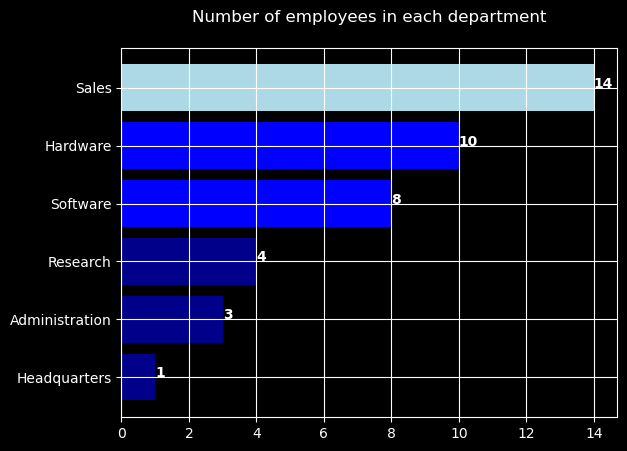

In [25]:
plt.style.use('dark_background')
plt.title('Number of employees in each department\n')

palette = [{i<5: 'darkblue', 5<=i<=10: 'blue', i>10: 'lightblue'}[True] for i in n]

plt.barh(y=dep, width=n, color = palette)
plt.grid()

for index, value in enumerate(n):
    plt.text(value, index, str(value), fontweight = 'bold')

#### 5. Percentage of employment by sex

Total employment by sex

In [29]:
res = con.execute(
    '''
        SELECT sex, COUNT(sex) AS SEX FROM employee JOIN department
            ON department.dnumber = employee.dno
        GROUP BY sex
    '''
)

sex, n = [], []
for x in res.fetchall():
    sex.append(x[0])
    n.append(x[1])

In [31]:
for i, j in zip(sex, n):
    print(f'{i}: {j}')

F: 11
M: 29


In [33]:
p = [100 * i/sum(n) for i in n]
p

[27.5, 72.5]

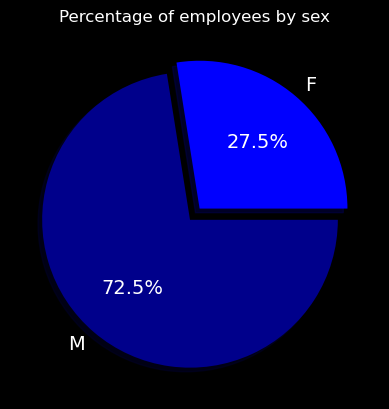

In [37]:
plt.title('Percentage of employees by sex')
plt.pie(
    p, 
    labels=sex, 
    autopct='%1.1f%%',
    textprops={'fontsize': 14},
    colors=['blue', 'darkblue'],
    shadow=True,
    frame=False,
    explode=tuple(.05 for i in range(len(n)))
);

Percentage of workforce per department by sex

In [39]:
def custom_pie(department):

    res = con.execute(
        f'''
            SELECT sex, COUNT(sex) AS SEX FROM employee JOIN department
                ON department.dnumber = employee.dno
            WHERE dname = '{department}'
            GROUP BY sex
        '''
    )
    
    sex, n = [], []
    for x in res.fetchall():
        sex.append(x[0])
        n.append(x[1])
    
    p = [100 * i/sum(n) for i in n]
    
    plt.title(f'Percentage of employees in {department} department by sex')
    plt.pie(
        p, 
        labels=sex, 
        autopct='%1.1f%%',
        textprops={'fontsize': 14},
        colors=['blue', 'darkblue'],
        shadow=True,
        frame=False,
        explode=tuple(.05 for i in range(len(n)))
    );

In [41]:
print(f'Departments: {dep}')

Departments: ['Headquarters', 'Administration', 'Research', 'Software', 'Hardware', 'Sales']


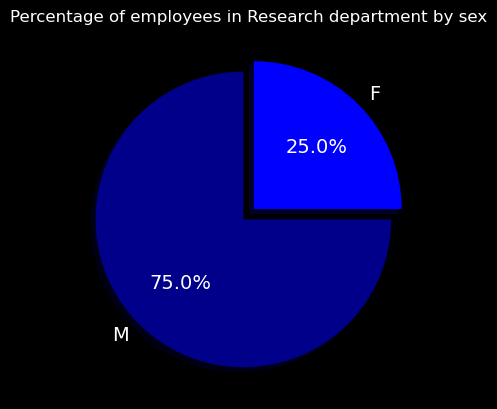

In [43]:
custom_pie(department=dep[2])

In [45]:
perc = {}

for d in dep:
    res = con.execute(
        f'''
            SELECT sex, COUNT(sex) AS SEX FROM employee JOIN department
                ON department.dnumber = employee.dno
            WHERE dname = '{d}'
            GROUP BY sex
        '''
    )
    
    sex, n = [], []
    for x in res.fetchall():
        sex.append(x[0])
        n.append(x[1])
    
    p = [100 * i/sum(n) for i in n]

    perc[d] = {'sex': sex, 'p': p}

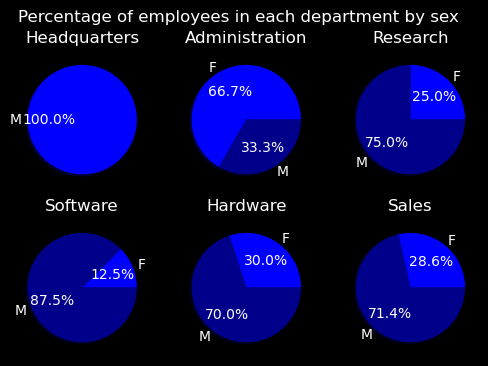

In [61]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(6,4))
plt.suptitle('Percentage of employees in each department by sex')

for (k,v), subplot in zip(perc.items(), axes.flatten()):
    subplot.pie(
        x=v.get('p'),
        labels=v.get('sex'),
        autopct='%1.1f%%',
        colors=['blue', 'darkblue'],
        shadow=True,
        frame=False
    )
    subplot.set_title(k)

In [47]:
import os

def delete_file(file):

    try:
        con.close()
    except NameError:
        pass
    
    if os.path.exists(file):
        os.remove(file)
        print(f'File {file} deleted successfully!')
    else:
        print(f'The file {file} does not exist!')

In [49]:
delete_file(file='company.db')

File company.db deleted successfully!
